In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
try:
    df_2016 = pd.read_csv('data_2016.csv')
    df_2017 = pd.read_csv('data_2017.csv')
except FileNotFoundError:
    # Adjust path if files are in a different folder
    try:
        df_2016 = pd.read_csv('../data/data_2016.csv')
        df_2017 = pd.read_csv('../data/data_2017.csv')
    except:
        print("Error: Files not found. Please upload data_2016.csv and data_2017.csv")

In [27]:
df = pd.concat([df_2016, df_2017], ignore_index=True)


In [28]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
995,IRISnet,IRIS,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07,2022-03-17
996,Circuits of Value,COVAL,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07,2022-03-17
997,ARPA Chain,ARPA,0.069003,-0.000,0.008,-0.037,1.363376e+07,6.776284e+07,2022-03-17
998,SuperRare,RARE,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07,2022-03-17


In [29]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['symbol', 'date'])

In [30]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
201,Tenset,10SET,3.300000,0.016,0.030,0.434,3.059468e+06,2.893283e+08,2022-03-16
702,Tenset,10SET,3.290000,0.001,0.003,0.345,2.346397e+06,2.901876e+08,2022-03-17
116,1inch,1INCH,1.500000,0.021,0.111,0.163,1.204571e+08,6.161451e+08,2022-03-16
622,1inch,1INCH,1.490000,0.008,-0.003,0.087,6.414515e+07,6.175054e+08,2022-03-17
61,Aave,AAVE,137.440000,0.037,0.131,0.129,2.823363e+08,1.862098e+09,2022-03-16
...,...,...,...,...,...,...,...,...,...
719,Zenon,ZNN,5.210000,0.007,-0.026,-0.114,3.813088e+04,2.572452e+08,2022-03-17
429,ZoidPay,ZPAY,0.309582,0.037,0.049,0.320,2.001620e+05,8.968396e+07,2022-03-16
936,ZoidPay,ZPAY,0.303949,-0.004,-0.018,0.212,5.807300e+05,8.890496e+07,2022-03-17
158,0x,ZRX,0.509791,0.025,0.035,0.028,2.930930e+07,4.279334e+08,2022-03-16


In [31]:
df = df.dropna()

In [32]:
df['liquidity_ratio'] = df['24h_volume'] / (df['mkt_cap'] + 1e-10)

In [34]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio
201,Tenset,10SET,3.300000,0.016,0.030,0.434,3.059468e+06,2.893283e+08,2022-03-16,0.010574
702,Tenset,10SET,3.290000,0.001,0.003,0.345,2.346397e+06,2.901876e+08,2022-03-17,0.008086
116,1inch,1INCH,1.500000,0.021,0.111,0.163,1.204571e+08,6.161451e+08,2022-03-16,0.195501
622,1inch,1INCH,1.490000,0.008,-0.003,0.087,6.414515e+07,6.175054e+08,2022-03-17,0.103878
61,Aave,AAVE,137.440000,0.037,0.131,0.129,2.823363e+08,1.862098e+09,2022-03-16,0.151623
...,...,...,...,...,...,...,...,...,...,...
719,Zenon,ZNN,5.210000,0.007,-0.026,-0.114,3.813088e+04,2.572452e+08,2022-03-17,0.000148
429,ZoidPay,ZPAY,0.309582,0.037,0.049,0.320,2.001620e+05,8.968396e+07,2022-03-16,0.002232
936,ZoidPay,ZPAY,0.303949,-0.004,-0.018,0.212,5.807300e+05,8.890496e+07,2022-03-17,0.006532
158,0x,ZRX,0.509791,0.025,0.035,0.028,2.930930e+07,4.279334e+08,2022-03-16,0.068490


In [35]:
df['log_volume'] = np.log1p(df['24h_volume'])
df['log_mkt_cap'] = np.log1p(df['mkt_cap'])

In [36]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,log_volume,log_mkt_cap
201,Tenset,10SET,3.300000,0.016,0.030,0.434,3.059468e+06,2.893283e+08,2022-03-16,0.010574,14.933752,19.483073
702,Tenset,10SET,3.290000,0.001,0.003,0.345,2.346397e+06,2.901876e+08,2022-03-17,0.008086,14.668392,19.486038
116,1inch,1INCH,1.500000,0.021,0.111,0.163,1.204571e+08,6.161451e+08,2022-03-16,0.195501,18.606804,20.238993
622,1inch,1INCH,1.490000,0.008,-0.003,0.087,6.414515e+07,6.175054e+08,2022-03-17,0.103878,17.976659,20.241198
61,Aave,AAVE,137.440000,0.037,0.131,0.129,2.823363e+08,1.862098e+09,2022-03-16,0.151623,19.458610,21.344970
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Zenon,ZNN,5.210000,0.007,-0.026,-0.114,3.813088e+04,2.572452e+08,2022-03-17,0.000148,10.548806,19.365540
429,ZoidPay,ZPAY,0.309582,0.037,0.049,0.320,2.001620e+05,8.968396e+07,2022-03-16,0.002232,12.206887,18.311802
936,ZoidPay,ZPAY,0.303949,-0.004,-0.018,0.212,5.807300e+05,8.890496e+07,2022-03-17,0.006532,13.272043,18.303078
158,0x,ZRX,0.509791,0.025,0.035,0.028,2.930930e+07,4.279334e+08,2022-03-16,0.068490,17.193416,19.874478


/var/folders/lt/92vvt3256lg5xyfxxq3r52zw0000gn/T/ipykernel_49197/348354491.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='temp_label', data=df, palette='viridis')


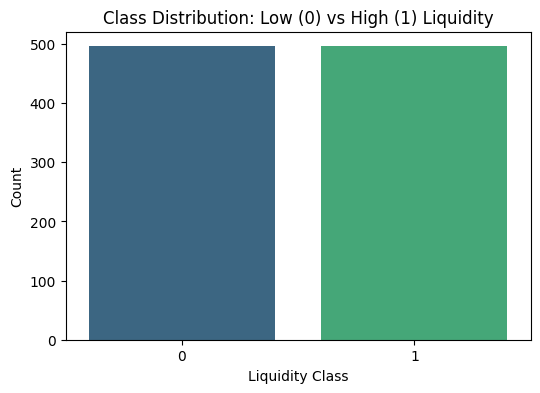

In [37]:
import seaborn as sns
plt.figure(figsize=(6, 4))
threshold_eda = df['liquidity_ratio'].median()
df['temp_label'] = (df['liquidity_ratio'] > threshold_eda).astype(int)
sns.countplot(x='temp_label', data=df, palette='viridis')
plt.title('Class Distribution: Low (0) vs High (1) Liquidity')
plt.xlabel('Liquidity Class')
plt.ylabel('Count')
plt.show()

In [38]:
df['p_chng_1d'] = df.groupby('symbol')['price'].pct_change().fillna(0)

In [39]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,log_volume,log_mkt_cap,temp_label,p_chng_1d
201,Tenset,10SET,3.300000,0.016,0.030,0.434,3.059468e+06,2.893283e+08,2022-03-16,0.010574,14.933752,19.483073,0,0.000000
702,Tenset,10SET,3.290000,0.001,0.003,0.345,2.346397e+06,2.901876e+08,2022-03-17,0.008086,14.668392,19.486038,0,-0.003030
116,1inch,1INCH,1.500000,0.021,0.111,0.163,1.204571e+08,6.161451e+08,2022-03-16,0.195501,18.606804,20.238993,1,0.000000
622,1inch,1INCH,1.490000,0.008,-0.003,0.087,6.414515e+07,6.175054e+08,2022-03-17,0.103878,17.976659,20.241198,1,-0.006667
61,Aave,AAVE,137.440000,0.037,0.131,0.129,2.823363e+08,1.862098e+09,2022-03-16,0.151623,19.458610,21.344970,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Zenon,ZNN,5.210000,0.007,-0.026,-0.114,3.813088e+04,2.572452e+08,2022-03-17,0.000148,10.548806,19.365540,0,-0.026168
429,ZoidPay,ZPAY,0.309582,0.037,0.049,0.320,2.001620e+05,8.968396e+07,2022-03-16,0.002232,12.206887,18.311802,0,0.000000
936,ZoidPay,ZPAY,0.303949,-0.004,-0.018,0.212,5.807300e+05,8.890496e+07,2022-03-17,0.006532,13.272043,18.303078,0,-0.018196
158,0x,ZRX,0.509791,0.025,0.035,0.028,2.930930e+07,4.279334e+08,2022-03-16,0.068490,17.193416,19.874478,1,0.000000


/var/folders/lt/92vvt3256lg5xyfxxq3r52zw0000gn/T/ipykernel_49197/920724497.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='temp_label', data=df, palette='viridis')


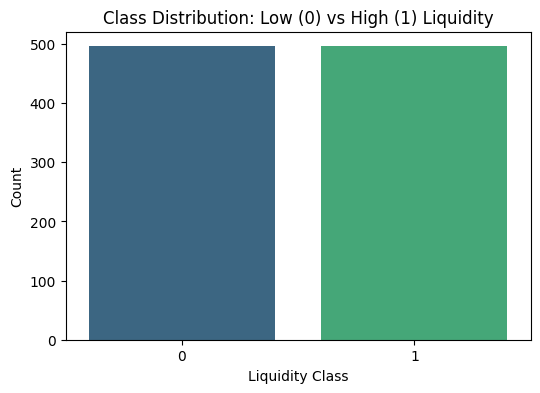

In [40]:

plt.figure(figsize=(6, 4))
threshold_eda = df['liquidity_ratio'].median()
df['temp_label'] = (df['liquidity_ratio'] > threshold_eda).astype(int)
sns.countplot(x='temp_label', data=df, palette='viridis')
plt.title('Class Distribution: Low (0) vs High (1) Liquidity')
plt.xlabel('Liquidity Class')
plt.ylabel('Count')
plt.show()

In [41]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,log_volume,log_mkt_cap,temp_label,p_chng_1d
201,Tenset,10SET,3.300000,0.016,0.030,0.434,3.059468e+06,2.893283e+08,2022-03-16,0.010574,14.933752,19.483073,0,0.000000
702,Tenset,10SET,3.290000,0.001,0.003,0.345,2.346397e+06,2.901876e+08,2022-03-17,0.008086,14.668392,19.486038,0,-0.003030
116,1inch,1INCH,1.500000,0.021,0.111,0.163,1.204571e+08,6.161451e+08,2022-03-16,0.195501,18.606804,20.238993,1,0.000000
622,1inch,1INCH,1.490000,0.008,-0.003,0.087,6.414515e+07,6.175054e+08,2022-03-17,0.103878,17.976659,20.241198,1,-0.006667
61,Aave,AAVE,137.440000,0.037,0.131,0.129,2.823363e+08,1.862098e+09,2022-03-16,0.151623,19.458610,21.344970,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Zenon,ZNN,5.210000,0.007,-0.026,-0.114,3.813088e+04,2.572452e+08,2022-03-17,0.000148,10.548806,19.365540,0,-0.026168
429,ZoidPay,ZPAY,0.309582,0.037,0.049,0.320,2.001620e+05,8.968396e+07,2022-03-16,0.002232,12.206887,18.311802,0,0.000000
936,ZoidPay,ZPAY,0.303949,-0.004,-0.018,0.212,5.807300e+05,8.890496e+07,2022-03-17,0.006532,13.272043,18.303078,0,-0.018196
158,0x,ZRX,0.509791,0.025,0.035,0.028,2.930930e+07,4.279334e+08,2022-03-16,0.068490,17.193416,19.874478,1,0.000000


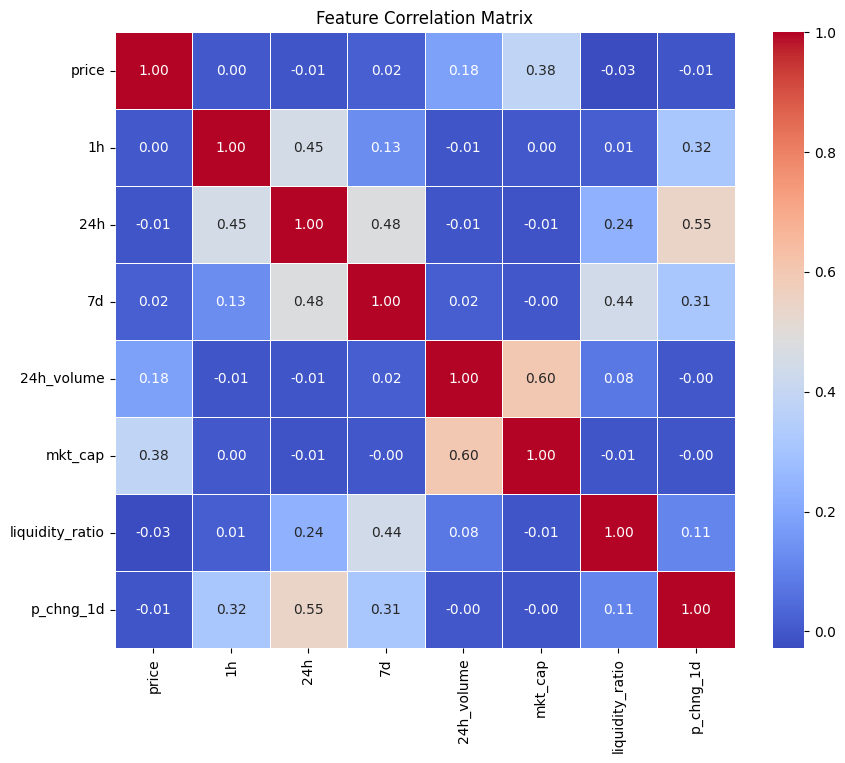

In [42]:
plt.figure(figsize=(10, 8))
numeric_df = df[['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'liquidity_ratio', 'p_chng_1d']]
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [43]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,log_volume,log_mkt_cap,temp_label,p_chng_1d
201,Tenset,10SET,3.300000,0.016,0.030,0.434,3.059468e+06,2.893283e+08,2022-03-16,0.010574,14.933752,19.483073,0,0.000000
702,Tenset,10SET,3.290000,0.001,0.003,0.345,2.346397e+06,2.901876e+08,2022-03-17,0.008086,14.668392,19.486038,0,-0.003030
116,1inch,1INCH,1.500000,0.021,0.111,0.163,1.204571e+08,6.161451e+08,2022-03-16,0.195501,18.606804,20.238993,1,0.000000
622,1inch,1INCH,1.490000,0.008,-0.003,0.087,6.414515e+07,6.175054e+08,2022-03-17,0.103878,17.976659,20.241198,1,-0.006667
61,Aave,AAVE,137.440000,0.037,0.131,0.129,2.823363e+08,1.862098e+09,2022-03-16,0.151623,19.458610,21.344970,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Zenon,ZNN,5.210000,0.007,-0.026,-0.114,3.813088e+04,2.572452e+08,2022-03-17,0.000148,10.548806,19.365540,0,-0.026168
429,ZoidPay,ZPAY,0.309582,0.037,0.049,0.320,2.001620e+05,8.968396e+07,2022-03-16,0.002232,12.206887,18.311802,0,0.000000
936,ZoidPay,ZPAY,0.303949,-0.004,-0.018,0.212,5.807300e+05,8.890496e+07,2022-03-17,0.006532,13.272043,18.303078,0,-0.018196
158,0x,ZRX,0.509791,0.025,0.035,0.028,2.930930e+07,4.279334e+08,2022-03-16,0.068490,17.193416,19.874478,1,0.000000


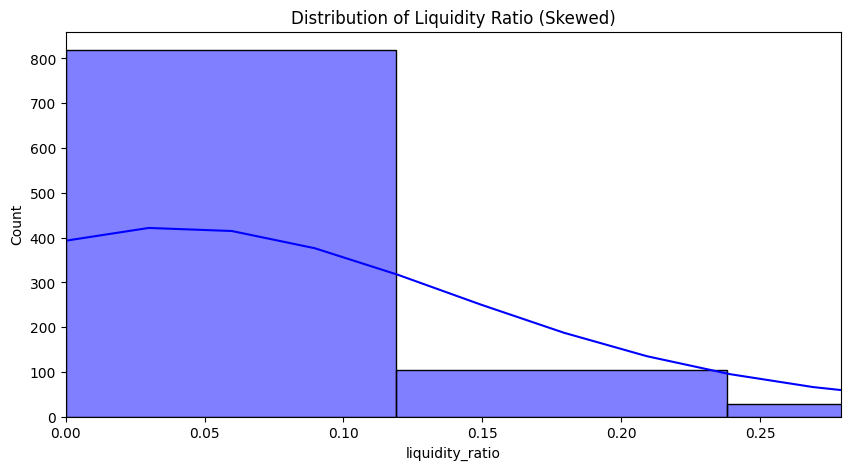

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(df['liquidity_ratio'], bins=50, kde=True, color='blue')
plt.title('Distribution of Liquidity Ratio (Skewed)')
plt.xlim(0, df['liquidity_ratio'].quantile(0.95)) # Outliers hata kar zoom kar rahe hain
plt.show()

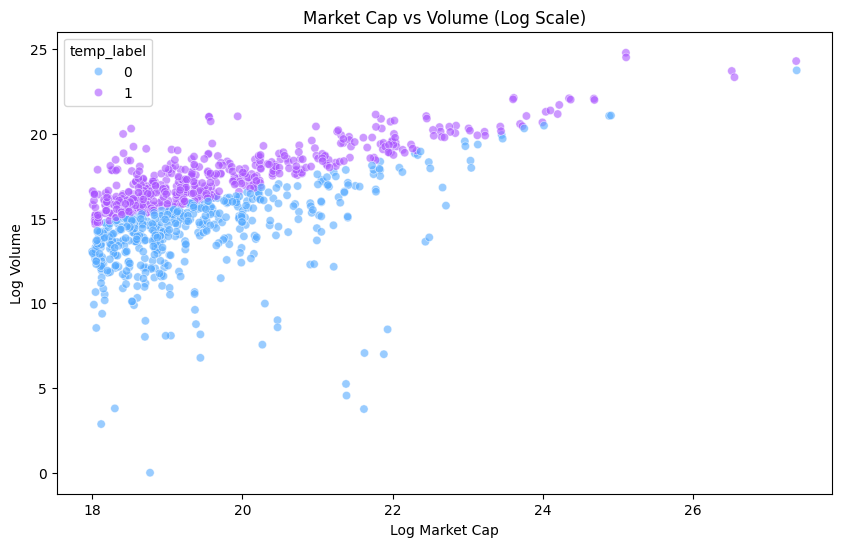

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_mkt_cap', y='log_volume', data=df, hue='temp_label', alpha=0.6, palette='cool')
plt.title('Market Cap vs Volume (Log Scale)')
plt.xlabel('Log Market Cap')
plt.ylabel('Log Volume')
plt.show()

In [47]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,log_volume,log_mkt_cap,temp_label,p_chng_1d
201,Tenset,10SET,3.300000,0.016,0.030,0.434,3.059468e+06,2.893283e+08,2022-03-16,0.010574,14.933752,19.483073,0,0.000000
702,Tenset,10SET,3.290000,0.001,0.003,0.345,2.346397e+06,2.901876e+08,2022-03-17,0.008086,14.668392,19.486038,0,-0.003030
116,1inch,1INCH,1.500000,0.021,0.111,0.163,1.204571e+08,6.161451e+08,2022-03-16,0.195501,18.606804,20.238993,1,0.000000
622,1inch,1INCH,1.490000,0.008,-0.003,0.087,6.414515e+07,6.175054e+08,2022-03-17,0.103878,17.976659,20.241198,1,-0.006667
61,Aave,AAVE,137.440000,0.037,0.131,0.129,2.823363e+08,1.862098e+09,2022-03-16,0.151623,19.458610,21.344970,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Zenon,ZNN,5.210000,0.007,-0.026,-0.114,3.813088e+04,2.572452e+08,2022-03-17,0.000148,10.548806,19.365540,0,-0.026168
429,ZoidPay,ZPAY,0.309582,0.037,0.049,0.320,2.001620e+05,8.968396e+07,2022-03-16,0.002232,12.206887,18.311802,0,0.000000
936,ZoidPay,ZPAY,0.303949,-0.004,-0.018,0.212,5.807300e+05,8.890496e+07,2022-03-17,0.006532,13.272043,18.303078,0,-0.018196
158,0x,ZRX,0.509791,0.025,0.035,0.028,2.930930e+07,4.279334e+08,2022-03-16,0.068490,17.193416,19.874478,1,0.000000


In [48]:
df = df.drop(columns=['temp_label'])

In [49]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,log_volume,log_mkt_cap,p_chng_1d
201,Tenset,10SET,3.300000,0.016,0.030,0.434,3.059468e+06,2.893283e+08,2022-03-16,0.010574,14.933752,19.483073,0.000000
702,Tenset,10SET,3.290000,0.001,0.003,0.345,2.346397e+06,2.901876e+08,2022-03-17,0.008086,14.668392,19.486038,-0.003030
116,1inch,1INCH,1.500000,0.021,0.111,0.163,1.204571e+08,6.161451e+08,2022-03-16,0.195501,18.606804,20.238993,0.000000
622,1inch,1INCH,1.490000,0.008,-0.003,0.087,6.414515e+07,6.175054e+08,2022-03-17,0.103878,17.976659,20.241198,-0.006667
61,Aave,AAVE,137.440000,0.037,0.131,0.129,2.823363e+08,1.862098e+09,2022-03-16,0.151623,19.458610,21.344970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Zenon,ZNN,5.210000,0.007,-0.026,-0.114,3.813088e+04,2.572452e+08,2022-03-17,0.000148,10.548806,19.365540,-0.026168
429,ZoidPay,ZPAY,0.309582,0.037,0.049,0.320,2.001620e+05,8.968396e+07,2022-03-16,0.002232,12.206887,18.311802,0.000000
936,ZoidPay,ZPAY,0.303949,-0.004,-0.018,0.212,5.807300e+05,8.890496e+07,2022-03-17,0.006532,13.272043,18.303078,-0.018196
158,0x,ZRX,0.509791,0.025,0.035,0.028,2.930930e+07,4.279334e+08,2022-03-16,0.068490,17.193416,19.874478,0.000000


In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_mkt_cap', y='log_volume', data=df, hue='temp_label', alpha=0.6, palette='cool')
plt.title('Market Cap vs Volume (Log Scale)')
plt.xlabel('Log Market Cap')
plt.ylabel('Log Volume')
plt.show()

ValueError: Could not interpret value `temp_label` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='liquidity_label', y='log_volume', data=df, palette='Set2')
plt.title('Volume Distribution for Low (0) vs High (1) Liquidity')
plt.xlabel('Liquidity Class')
plt.ylabel('Log Volume')
plt.show()

ValueError: Could not interpret value `liquidity_label` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

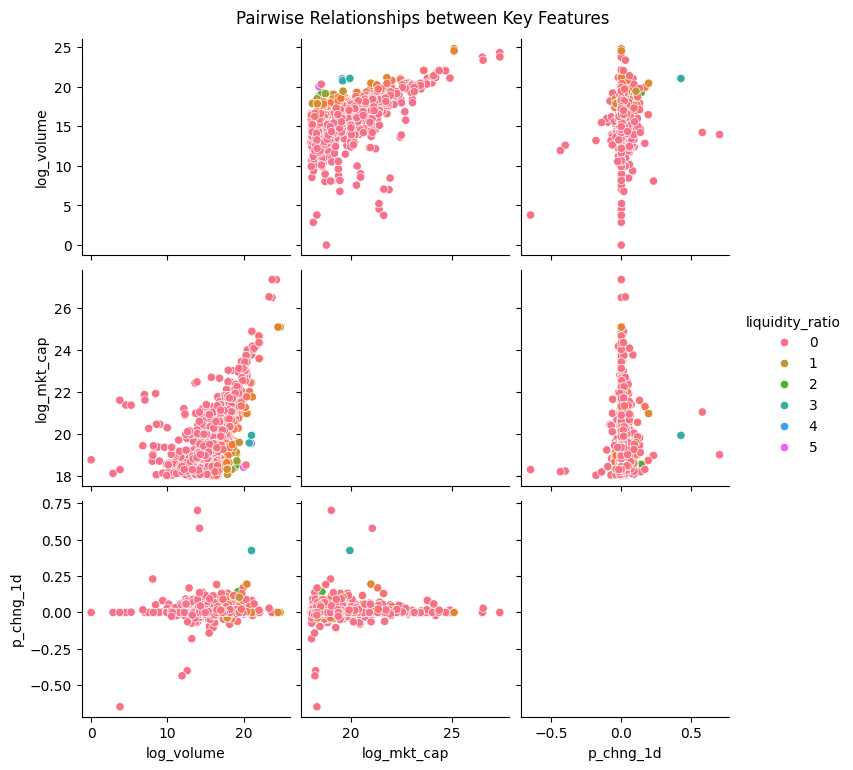

In [52]:
important_cols = ['log_volume', 'log_mkt_cap', 'p_chng_1d', 'liquidity_ratio']
sns.pairplot(df[important_cols], hue='liquidity_ratio', palette='husl', diag_kind='kde')
plt.suptitle('Pairwise Relationships between Key Features', y=1.02)
plt.show()

/var/folders/lt/92vvt3256lg5xyfxxq3r52zw0000gn/T/ipykernel_49197/2472739807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='liquidity_ratio', y='p_chng_1d', data=df, palette='muted', split=True)


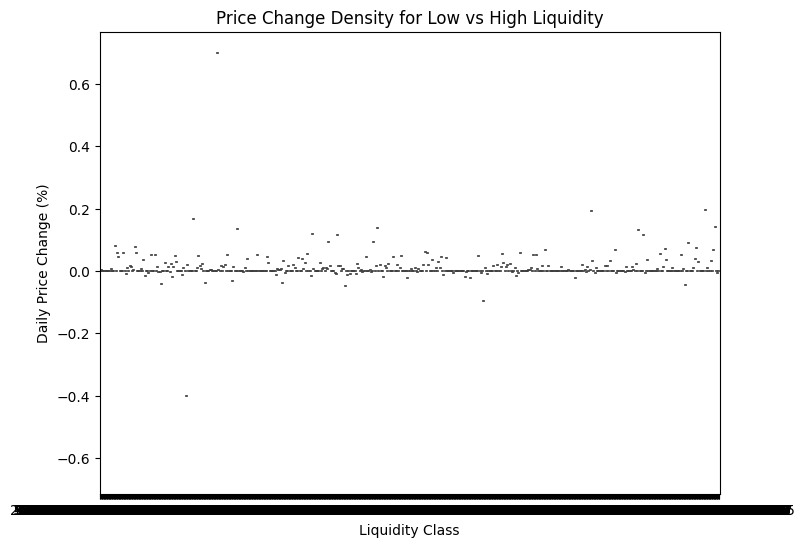

In [53]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='liquidity_ratio', y='p_chng_1d', data=df, palette='muted', split=True)
plt.title('Price Change Density for Low vs High Liquidity')
plt.xlabel('Liquidity Class')
plt.ylabel('Daily Price Change (%)')
# plt.ylim(-0.5, 0.5) 

plt.show()


In [54]:
threshold = df['liquidity_ratio'].median()
df['liquidity_label'] = (df['liquidity_ratio'] > threshold).astype(int)

/var/folders/lt/92vvt3256lg5xyfxxq3r52zw0000gn/T/ipykernel_49197/1260531128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='liquidity_label', y='p_chng_1d', data=df, palette='muted', split=True)


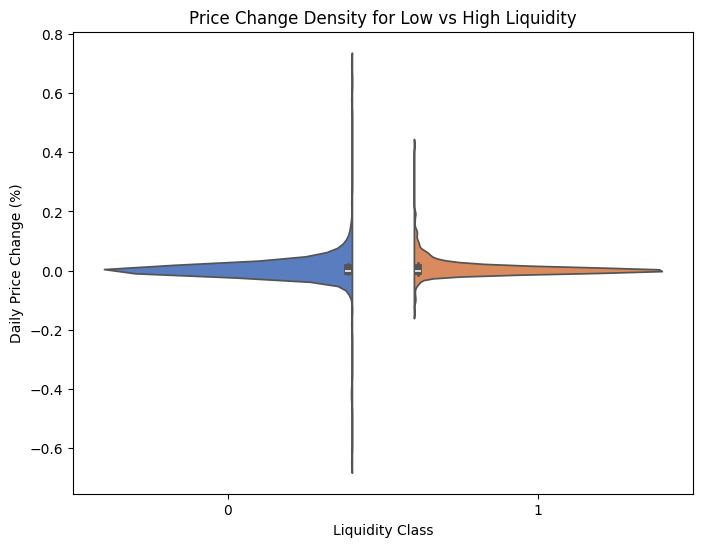

In [55]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='liquidity_label', y='p_chng_1d', data=df, palette='muted', split=True)
plt.title('Price Change Density for Low vs High Liquidity')
plt.xlabel('Liquidity Class')
plt.ylabel('Daily Price Change (%)')
# plt.ylim(-0.5, 0.5) 

plt.show()

In [56]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,log_volume,log_mkt_cap,p_chng_1d,liquidity_label
201,Tenset,10SET,3.300000,0.016,0.030,0.434,3.059468e+06,2.893283e+08,2022-03-16,0.010574,14.933752,19.483073,0.000000,0
702,Tenset,10SET,3.290000,0.001,0.003,0.345,2.346397e+06,2.901876e+08,2022-03-17,0.008086,14.668392,19.486038,-0.003030,0
116,1inch,1INCH,1.500000,0.021,0.111,0.163,1.204571e+08,6.161451e+08,2022-03-16,0.195501,18.606804,20.238993,0.000000,1
622,1inch,1INCH,1.490000,0.008,-0.003,0.087,6.414515e+07,6.175054e+08,2022-03-17,0.103878,17.976659,20.241198,-0.006667,1
61,Aave,AAVE,137.440000,0.037,0.131,0.129,2.823363e+08,1.862098e+09,2022-03-16,0.151623,19.458610,21.344970,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Zenon,ZNN,5.210000,0.007,-0.026,-0.114,3.813088e+04,2.572452e+08,2022-03-17,0.000148,10.548806,19.365540,-0.026168,0
429,ZoidPay,ZPAY,0.309582,0.037,0.049,0.320,2.001620e+05,8.968396e+07,2022-03-16,0.002232,12.206887,18.311802,0.000000,0
936,ZoidPay,ZPAY,0.303949,-0.004,-0.018,0.212,5.807300e+05,8.890496e+07,2022-03-17,0.006532,13.272043,18.303078,-0.018196,0
158,0x,ZRX,0.509791,0.025,0.035,0.028,2.930930e+07,4.279334e+08,2022-03-16,0.068490,17.193416,19.874478,0.000000,1


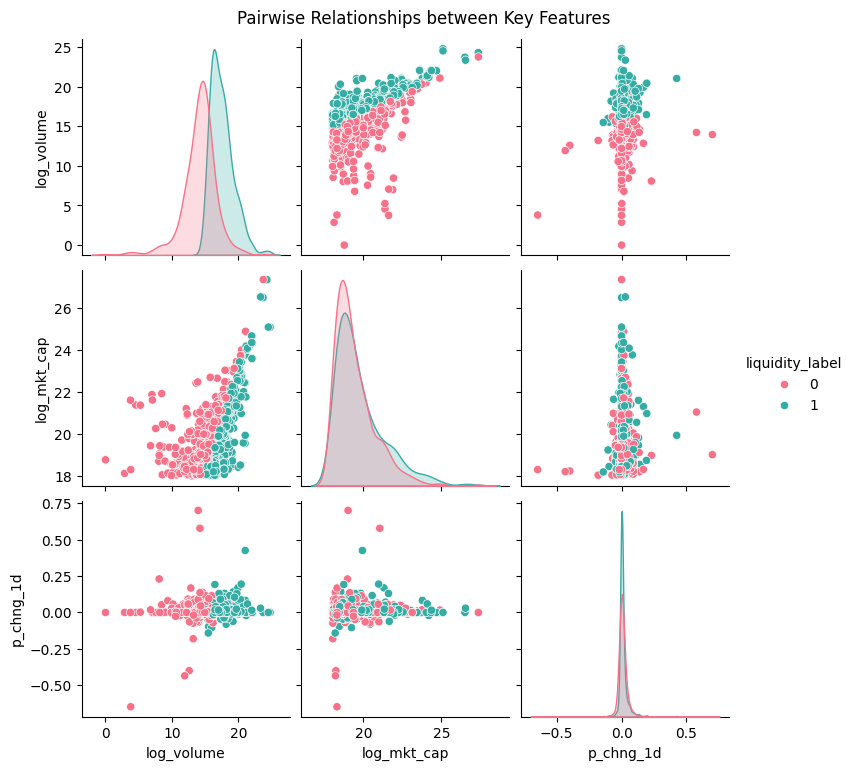

In [57]:
important_cols = ['log_volume', 'log_mkt_cap', 'p_chng_1d', 'liquidity_label'] 

sns.pairplot(df[important_cols], hue='liquidity_label', palette='husl', diag_kind='kde')
plt.suptitle('Pairwise Relationships between Key Features', y=1.02)
plt.show()

In [58]:
features = [
    'price',
    '1h',
    '24h',
    '7d',
    'p_chng_1d',
    'log_volume',   # Added back as it's a strong predictor
    'log_mkt_cap'   # Added back
]

In [60]:
X = df[features]
y = df['liquidity_label']

# Handle any remaining NaNs/Infs
X = X.replace([np.inf, -np.inf], 0).fillna(0)

In [61]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,log_volume,log_mkt_cap,p_chng_1d,liquidity_label
201,Tenset,10SET,3.300000,0.016,0.030,0.434,3.059468e+06,2.893283e+08,2022-03-16,0.010574,14.933752,19.483073,0.000000,0
702,Tenset,10SET,3.290000,0.001,0.003,0.345,2.346397e+06,2.901876e+08,2022-03-17,0.008086,14.668392,19.486038,-0.003030,0
116,1inch,1INCH,1.500000,0.021,0.111,0.163,1.204571e+08,6.161451e+08,2022-03-16,0.195501,18.606804,20.238993,0.000000,1
622,1inch,1INCH,1.490000,0.008,-0.003,0.087,6.414515e+07,6.175054e+08,2022-03-17,0.103878,17.976659,20.241198,-0.006667,1
61,Aave,AAVE,137.440000,0.037,0.131,0.129,2.823363e+08,1.862098e+09,2022-03-16,0.151623,19.458610,21.344970,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Zenon,ZNN,5.210000,0.007,-0.026,-0.114,3.813088e+04,2.572452e+08,2022-03-17,0.000148,10.548806,19.365540,-0.026168,0
429,ZoidPay,ZPAY,0.309582,0.037,0.049,0.320,2.001620e+05,8.968396e+07,2022-03-16,0.002232,12.206887,18.311802,0.000000,0
936,ZoidPay,ZPAY,0.303949,-0.004,-0.018,0.212,5.807300e+05,8.890496e+07,2022-03-17,0.006532,13.272043,18.303078,-0.018196,0
158,0x,ZRX,0.509791,0.025,0.035,0.028,2.930930e+07,4.279334e+08,2022-03-16,0.068490,17.193416,19.874478,0.000000,1


In [63]:
# STEP 5: TIME-BASED SPLIT
# ==========================================

# Using 80% split point by time
split_date = df['date'].sort_values().iloc[int(len(df) * 0.8)]

print(f"Splitting Data at: {split_date}")

train_df = df[df['date'] < split_date]
test_df  = df[df['date'] >= split_date]

X_train = train_df[features].fillna(0)
y_train = train_df['liquidity_label']

X_test = test_df[features].fillna(0)
y_test = test_df['liquidity_label']

print(f"Train size: {X_train.shape[0]}")
print(f"Test size:  {X_test.shape[0]}")

Splitting Data at: 2022-03-17 00:00:00
Train size: 497
Test size:  495


In [64]:
# STEP 6: SCALING
# ==========================================
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
# STEP 7: MODEL COMPARISON
# ==========================================
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC()
}


In [66]:
from sklearn.metrics import accuracy_score
results = []
print("\n--- MODEL COMPARISON ---")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})
    print(f"{name}: {acc:.4f}")

leaderboard = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n--- LEADERBOARD ---\n", leaderboard)



--- MODEL COMPARISON ---
Logistic Regression: 0.9515
Random Forest: 0.9313
Gradient Boosting: 0.9455
SVM: 0.8970

--- LEADERBOARD ---
                  Model  Accuracy
0  Logistic Regression  0.951515
2    Gradient Boosting  0.945455
1        Random Forest  0.931313
3                  SVM  0.896970


In [67]:
# ==========================================
# STEP 8: FINE TUNING BEST MODEL (RANDOM FOREST)
# ==========================================
from sklearn.model_selection import GridSearchCV

print("\n--- FINE TUNING RANDOM FOREST ---")
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [ 10, 20,100,500],
    'criterion': ['gini', 'entropy']
}


--- FINE TUNING RANDOM FOREST ---


In [68]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
y_pred_final = best_model.predict(X_test_scaled)

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("\n--- FINAL MODEL RESULTS ---")
print("Best Parameters:", grid_search.best_params_)
print("Final Accuracy:", accuracy_score(y_test, y_pred_final))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_final))


--- FINAL MODEL RESULTS ---
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}
Final Accuracy: 0.9313131313131313

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       257
           1       0.92      0.94      0.93       238

    accuracy                           0.93       495
   macro avg       0.93      0.93      0.93       495
weighted avg       0.93      0.93      0.93       495



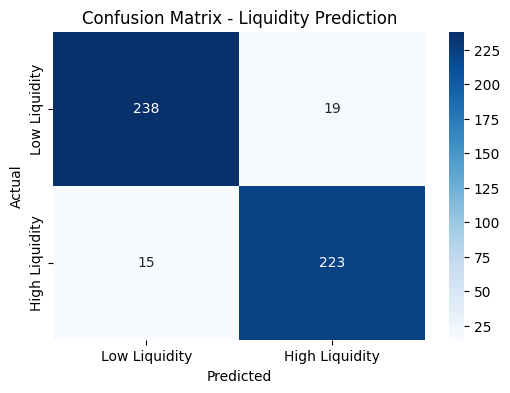

In [70]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_final),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Low Liquidity', 'High Liquidity'],
    yticklabels=['Low Liquidity', 'High Liquidity']
)
plt.title("Confusion Matrix - Liquidity Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [73]:
import os
import joblib

# ==========================================
# STEP 10 (CORRECTED): SAVE TO ROOT/MODELS
# ==========================================

# '../models' ka matlab: 
# 1. '../' -> Current folder se bahar niklo (Root mein jao)
# 2. 'models' -> Wahan 'models' naam ka folder dhundo/banao
folder_path = '../models'

# Check karo aur folder banao
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"📂 Created folder at root: {folder_path}")
else:
    print(f"📂 Folder found at root: {folder_path}")

# Paths define karo
model_path = os.path.join(folder_path, 'crypto_liquidity_model.pkl')
scaler_path = os.path.join(folder_path, 'scaler.pkl')

# Save karo
if 'best_model' in locals() and 'scaler' in locals():
    joblib.dump(best_model, model_path)
    joblib.dump(scaler, scaler_path)
    
    print(f"\n✅ Files saved successfully in ROOT Directory:")
    print(f"   - {model_path}")
    print(f"   - {scaler_path}")
else:
    print("❌ Error: Models memory mein nahi hain.")

📂 Created folder at root: ../models

✅ Files saved successfully in ROOT Directory:
   - ../models/crypto_liquidity_model.pkl
   - ../models/scaler.pkl
